In [1]:
import tensorflow as tf
import tensorflow.keras as tk
import numpy as np
import os 
import cv2
import matplotlib.pyplot as plt
from pathlib import Path
import random
import pickle


In [5]:
path = './images'
y = []
for img in os.listdir(path):
    pic = cv2.imread(os.path.join(path,img))
    pic = cv2.cvtColor(pic,cv2.COLOR_BGR2RGB)
    pic = cv2.resize(pic,(512,512))
    y.append(pic)
y = np.asarray(y)
y = y/255

In [6]:
print(y.shape)

(16, 512, 512, 3)


In [19]:
def make_input_vec(val):
    vec = []
    for i in range(0,len(y)):
        vec.append(0)
    vec[val]=1
    return np.asarray(vec)

In [9]:
x = []
for i in range(0,len(y)):
    x.append(np.array(make_input_vec(i),dtype = object).astype('float32'))

In [11]:
x= np.asarray(x)
x.shape

(16, 16)

In [12]:
y = y.reshape(len(y),-1)

In [14]:
y.shape

(16, 786432)

In [21]:
gen = tf.keras.Sequential([
    tf.keras.layers.Dense(units = 18 , activation = 'relu'),
    tf.keras.layers.Dense(units = 32,activation='relu'),
    tf.keras.layers.Dense(units = 512*512*3)
])

In [22]:
gen.compile(optimizer='adam',loss = tk.losses.MeanSquaredError(),metrics='accuracy')

In [23]:
#change the number of epochs depending on your dataset
#you can simply run this code again to improve the accuracy of your model
gen.fit(x,y,epochs= 500)

Epoch 1/500
1/1 [==============================] - 1s 1s/step - loss: 0.2330 - accuracy: 0.0000e+00
Epoch 2/500
1/1 [==============================] - 1s 591ms/step - loss: 0.2326 - accuracy: 0.0000e+00
Epoch 3/500
1/1 [==============================] - 1s 576ms/step - loss: 0.2322 - accuracy: 0.0000e+00
Epoch 4/500
1/1 [==============================] - 1s 625ms/step - loss: 0.2317 - accuracy: 0.0000e+00
Epoch 5/500
1/1 [==============================] - 1s 634ms/step - loss: 0.2312 - accuracy: 0.0000e+00
Epoch 6/500
1/1 [==============================] - 1s 551ms/step - loss: 0.2306 - accuracy: 0.0000e+00
Epoch 7/500
1/1 [==============================] - 1s 574ms/step - loss: 0.2299 - accuracy: 0.0000e+00
Epoch 8/500
1/1 [==============================] - 1s 550ms/step - loss: 0.2292 - accuracy: 0.0000e+00
Epoch 9/500
1/1 [==============================] - 1s 590ms/step - loss: 0.2284 - accuracy: 0.0000e+00
Epoch 10/500
1/1 [==============================] - 1s 573ms/step - loss: 0.

1/1 [==============================] - 0s 58ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


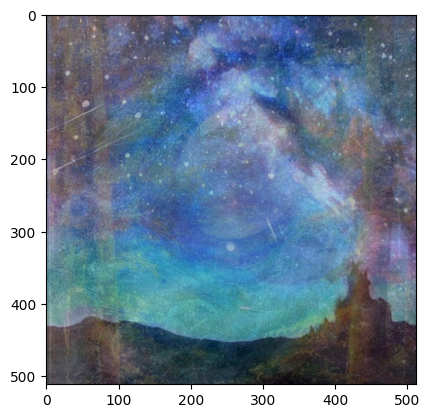

In [24]:
#if you want to output indivdual images without blending them

test = make_input_vec(0)
res = gen.predict(np.asarray([test]))
res = res.reshape(512,512,3)
plt.imshow(res)

In [ ]:
def make_multiple_input():
    i1 = random.randint(0,len(y)-1)
    i2 = random.randint(0,len(y)-1)
    v = make_input_vec(i1)
    v[i2]=1
    return v

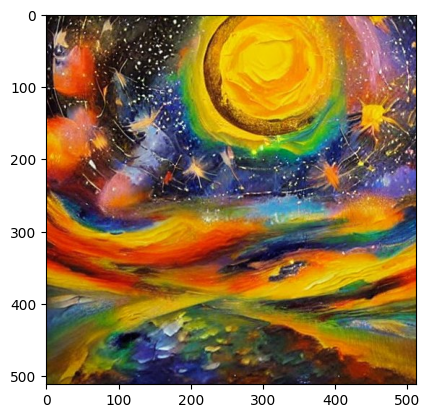

In [362]:
tmp = y[17:18] 
tmp = tmp.reshape(512,512,3)
plt.imshow(tmp)

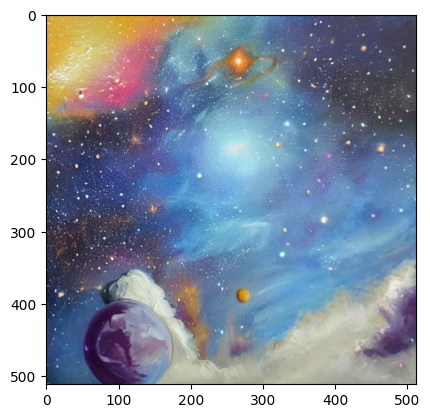

In [363]:
tmp = y[10:11] 
tmp = tmp.reshape(512,512,3)
plt.imshow(tmp)

In [392]:
with open('./snowforest/hybrid_gen2.pkl','wb') as f:
    pickle.dump(gen,f)

Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers\dense
......vars
.........0
.........1
...layers\dense_1
......vars
.........0
.........1
...layers\dense_2
......vars
.........0
.........1
...metrics\mean
......vars
.........0
.........1
...metrics\mean_metric_wrapper
......vars
.........0
.........1
...optimizer
......vars
.........0
.........1
.........10
.........11
.........12
.........2
.........3
.........4
.........5
.........6
.........7
.........8
.........9
...vars
Keras model archive saving:
File Name                                             Modified             Size
config.json                                    2023-03-22 17:33:32         1954
metadata.json                                  2023-03-22 17:33:32           64
variables.h5                                   2023-03-22 17:33:35    613473488


In [1]:
import pickle
import matplotlib.pyplot as plt

import tensorflow as tf
import numpy as np


with open('./snowforest/hybrid_gen2.pkl', 'rb') as f:
    model = pickle.load(f)


Keras model archive loading:
File Name                                             Modified             Size
config.json                                    2023-03-22 17:33:32         1954
metadata.json                                  2023-03-22 17:33:32           64
variables.h5                                   2023-03-22 17:33:34    613473488
Keras weights file (<HDF5 file "variables.h5" (mode r)>) loading:
...layers\dense
......vars
.........0
.........1
...layers\dense_1
......vars
.........0
.........1
...layers\dense_2
......vars
.........0
.........1
...metrics\mean
......vars
.........0
.........1
...metrics\mean_metric_wrapper
......vars
.........0
.........1
...optimizer
......vars
.........0
.........1
.........10
.........11
.........12
.........2
.........3
.........4
.........5
.........6
.........7
.........8
.........9
...vars


[[0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]
1/1 [==============================] - 0s 43ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


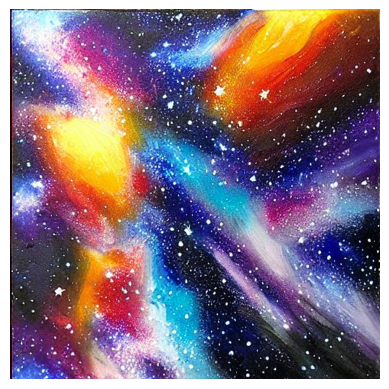

In [40]:
val = np.asarray([rand_vec()])
print(val)
res = model.predict(val)
res = res.reshape(512,512,3)
pic = cv2.resize(res,(1080,1080))
pic = pic 
from PIL import Image
sharpen_filter = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
sharp_pic = cv2.filter2D(pic, -1, sharpen_filter)
sharp_pic = cv2.filter2D(pic, -1, sharpen_filter)
fig = plt.imshow(sharp_pic)
plt.axis('off')
fig.axes.get_xaxis().set_visible(False)
fig.axes.get_yaxis().set_visible(False)
plt.axis('off')
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


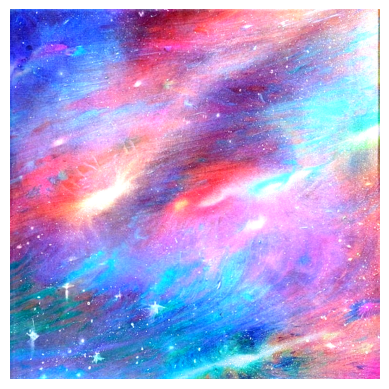

In [30]:
from PIL import Image
sharpen_filter = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
sharp_pic = cv2.filter2D(pic, -1, sharpen_filter)
sharp_pic = cv2.filter2D(pic, -1, sharpen_filter)
fig = plt.imshow(sharp_pic)
plt.axis('off')
fig.axes.get_xaxis().set_visible(False)
fig.axes.get_yaxis().set_visible(False)
plt.axis('off')
plt.show()
# im =  Image.fromarray((sharp_pic*1.0).astype(np.uint8))
# im.show()